In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

import warnings 
warnings.filterwarnings('ignore')

In [249]:
url='http://users.stat.ufl.edu/~winner/data/airq402.dat'
url
user_cols =['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market share','price']

df=pd.read_table(url,header=None,names=user_cols,delim_whitespace=True)
df


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


Exploratory Data Analysis

In [250]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [252]:
df.describe()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [253]:
y=df.iloc[:,2]
y.head()

0    114.47
1    122.47
2    214.42
3     69.40
4    158.13
Name: Average Fare, dtype: float64

In [254]:
y.shape

(1000,)

In [255]:
x_distance =df.iloc[:,3]
x_distance.head()

0    528
1    860
2    852
3    288
4    723
Name: Distance, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

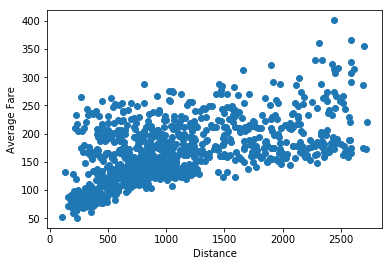

In [256]:
plt.xlabel("Distance")
plt.ylabel("Average Fare")
plt.scatter(x_distance,y)
plt.plot

The figure shows the positive correlation between distance and average fare.That means increase in distance 
increases the average fare too. Hence distance is important attribute that gives boost to decide fare.

Let's examine the correlation between fare with weekly passengers attribute 

[]

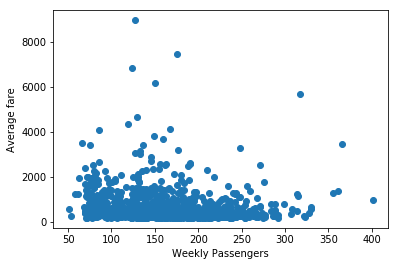

In [257]:
plt.xlabel("Weekly Passengers")
plt.ylabel("Average fare")
plt.scatter(y,df.iloc[:,4])
plt.plot()
          

The figure shows there is no correlation between increase in weekly passengers with average fare attribute.
Hence this attribute is not contributing significantly to the variable y(fare).

[]

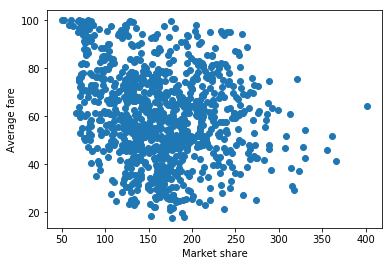

In [258]:
plt.xlabel("Market share")
plt.ylabel("Average fare")
plt.scatter(y,df.iloc[:,6])
plt.plot()


The figure shows correlation between market share column and average fare.

[]

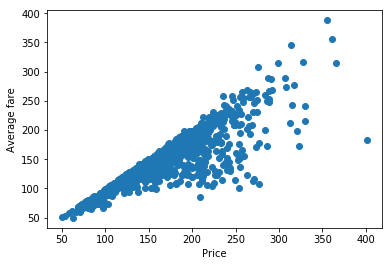

In [259]:
plt.xlabel("Price")
plt.ylabel("Average fare")
plt.scatter(y,df.iloc[:,10])
plt.plot()


The figure shows the positive correlation between price  and average fare.That means increase in price 
increases the average fare too. Hence price is important attribute that gives boost to decide fare.

In [260]:

# Dropping the city1,city2  columns as these are just two destinations point.
df.drop(['City1','City2'],axis=1,inplace=True)
df.head()

,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [261]:
# transforming the market leading airline and low price airline attribute into the categorical numeric variable
# using label encoder technique

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df.iloc[:,3]=le.fit_transform(df.iloc[:,3])

df.iloc[:,6]=le.fit_transform(df.iloc[:,6])
    
df.head()


,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


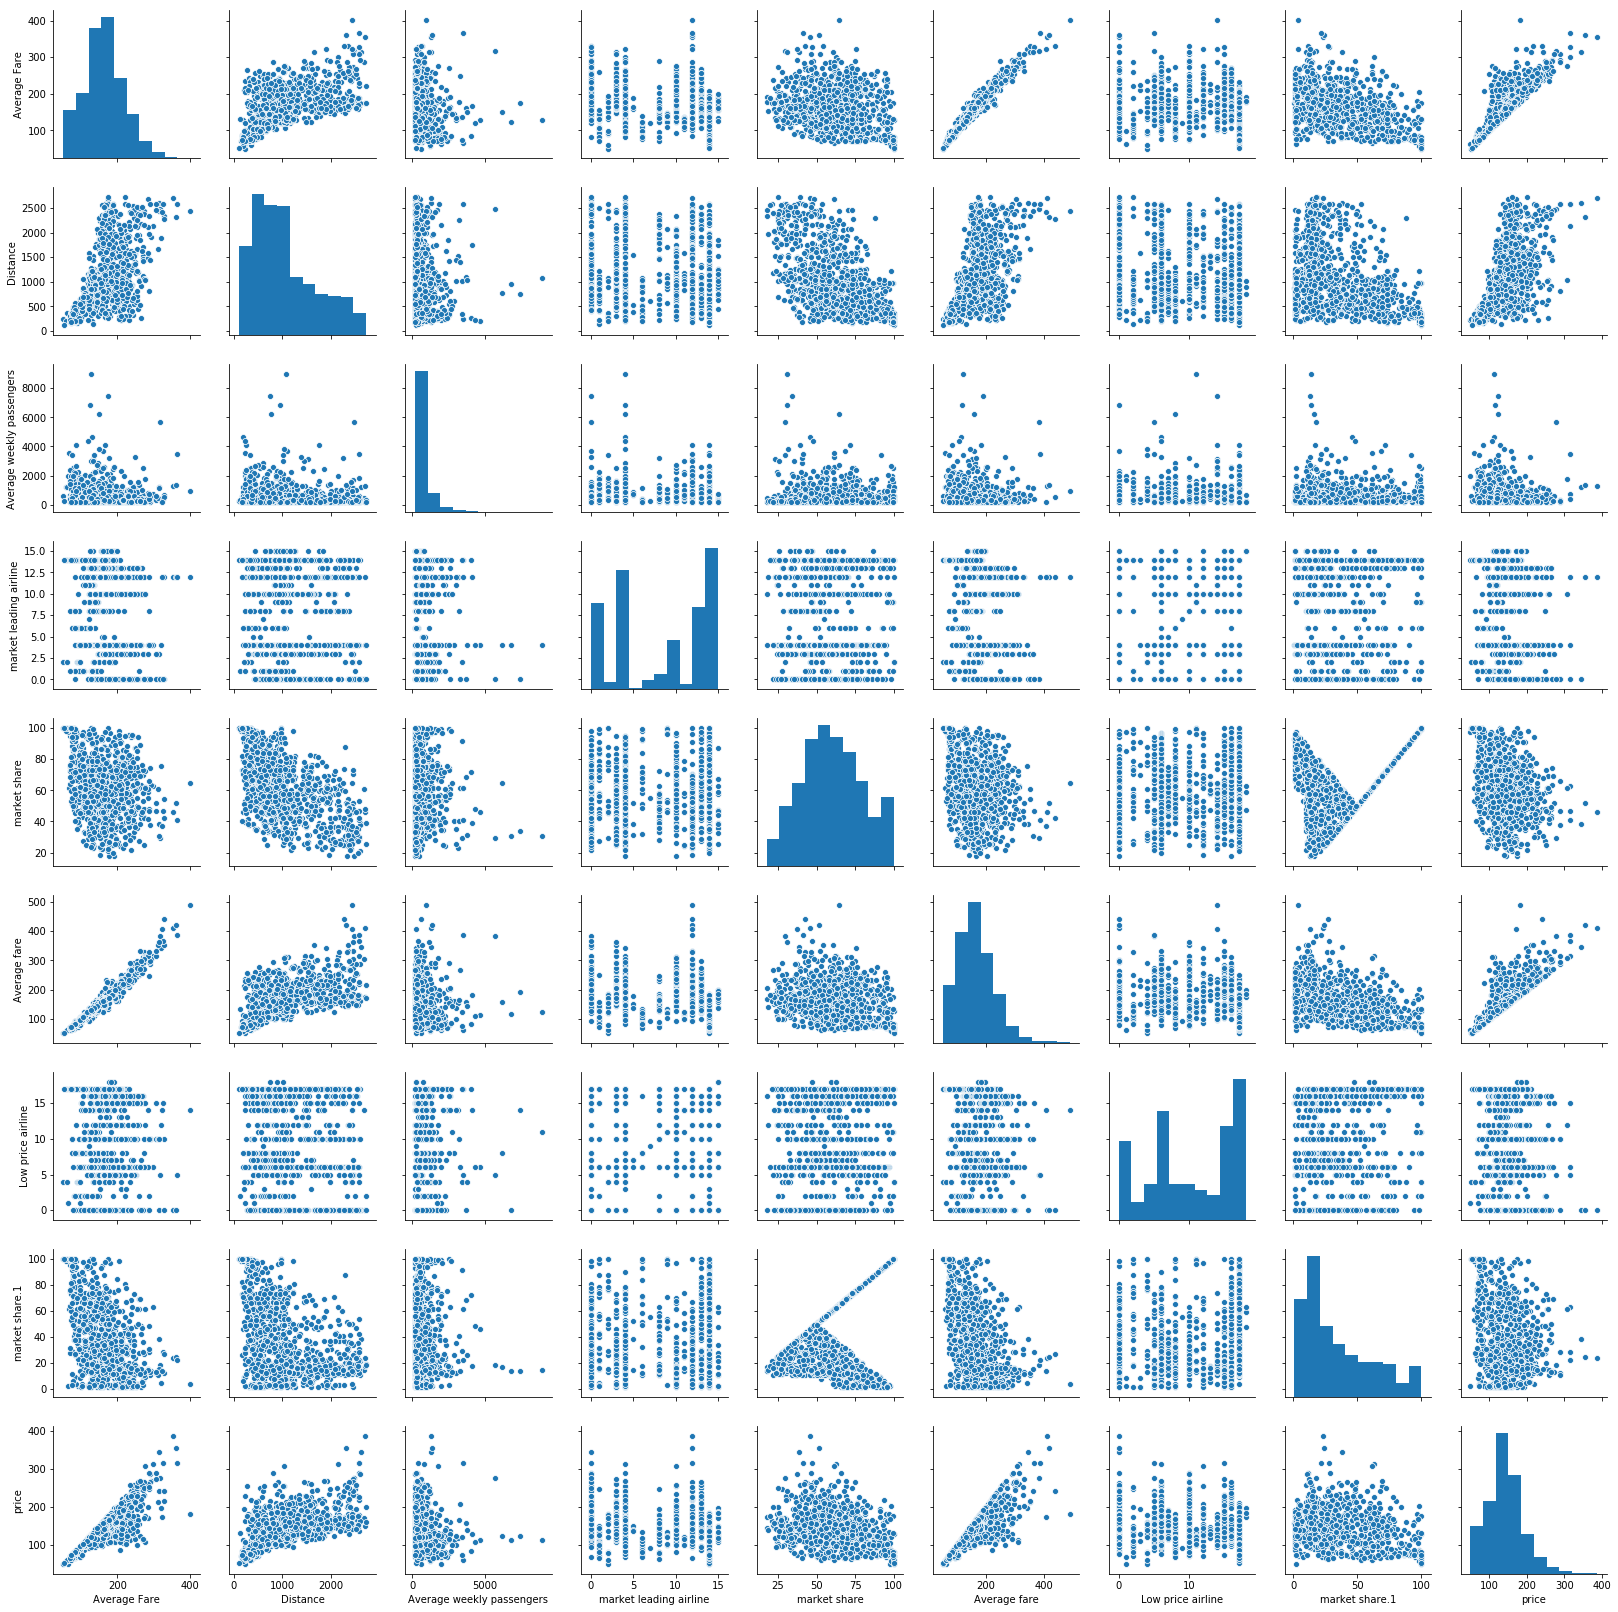

In [262]:
import seaborn as sns
sns.pairplot(df)

Average weekly passengers attribute is highly skewed .
Needs to standardized the column with standard scaler technique

     Average weekly passengers
0                    -0.323336
1                    -0.516148
2                    -0.595872
3                    -0.085415
4                    -0.468897
5                    -0.617722
6                    -0.567927
7                    -0.626950
8                    -0.158900
9                    -0.612619
10                   -0.618009
11                   -0.469746
12                   -0.401364
13                    0.218631
14                   -0.475137
15                   -0.390726
16                   -0.067115
17                   -0.022554
18                   -0.633046
19                   -0.427899
20                   -0.370860
21                   -0.628647
22                    0.757191
23                   -0.586514
24                   -0.425485
25                   -0.506358
26                   -0.627942
27                   -0.483516
28                   -0.074633
29                   -0.577573
..                         ...
970     

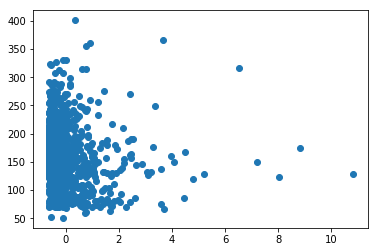

In [263]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[["Average weekly passengers"]]=sc.fit_transform(df[["Average weekly passengers"]])
print(df[["Average weekly passengers"]])


In [264]:
df.head()

,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,114.47,528,-0.323336,6,70.19,111.03,8,70.19,111.03
1,122.47,860,-0.516148,6,75.10,123.09,6,17.23,118.94
2,214.42,852,-0.595872,4,78.89,223.98,5,2.77,167.12
3,69.40,288,-0.085415,14,96.97,68.86,17,96.97,68.86
4,158.13,723,-0.468897,12,39.79,161.36,17,15.34,145.42


In [265]:
y

0      114.47
1      122.47
2      214.42
3       69.40
4      158.13
5      135.17
6      152.85
7      190.73
8      129.35
9      134.17
10     212.49
11     173.56
12     170.67
13     120.24
14     168.69
15     154.40
16     114.24
17     132.29
18     181.99
19     233.05
20     162.21
21     161.74
22      71.57
23     163.63
24     134.42
25     165.69
26      77.82
27     227.93
28      74.82
29     120.50
        ...  
970    110.64
971     98.36
972    263.37
973    165.13
974    177.77
975    215.04
976    122.02
977     82.34
978    148.62
979    177.91
980     74.62
981    330.21
982    134.18
983    116.78
984    237.26
985    401.23
986     77.11
987    105.84
988    144.22
989    322.83
990    156.01
991     70.61
992    162.46
993    131.47
994    288.14
995    136.16
996     83.28
997    159.97
998     73.57
999    126.67
Name: Average Fare, Length: 1000, dtype: float64

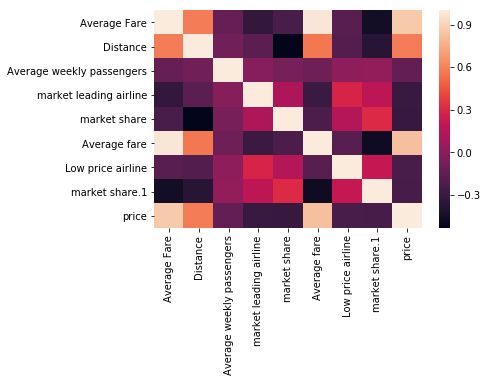

In [266]:
heat_corr=df.corr()
sns.heatmap(heat_corr)

From the heatmap ,we can see the Average fare and Distance attribute is highly correlated.
The column average weekly passengers is not correlated as it id in the dark purple shade. The market share 
and market leading airline are correlated. 


In [267]:
x=df.iloc[:,1:9]
x.head()

,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,528,-0.323336,6,70.19,111.03,8,70.19,111.03
1,860,-0.516148,6,75.10,123.09,6,17.23,118.94
2,852,-0.595872,4,78.89,223.98,5,2.77,167.12
3,288,-0.085415,14,96.97,68.86,17,96.97,68.86
4,723,-0.468897,12,39.79,161.36,17,15.34,145.42


In [268]:
print(x.shape)
print(y.shape)

(1000, 8)
(1000,)


In [269]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(670, 8)
(330, 8)
(670,)
(330,)


In [270]:
lm=LinearRegression()
lm.fit(x_train,y_train)
print("Coefficient:",lm.coef_)
print("Intercept:",lm.intercept_)
lmpred=lm.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,lmpred))
print("R2_score:",r2_score(y_test,lmpred))
     

Coefficient: [ 0.00278734 -0.59989404 -0.28336433  0.08201524  0.69919793  0.19537186
 -0.07341836  0.21826072]
Intercept: 10.536427809039878
Mean_Squared_error: 76.43056160044894
R2_score: 0.9760270526395927


In [271]:
ls=Lasso()
ls.fit(x_train,y_train)
print("Coefficient:",ls.coef_)
print("Intercept:",ls.intercept_)
lspred=ls.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,lspred))
print("R2_score:",r2_score(y_test,lspred))


Coefficient: [ 0.00282054 -0.         -0.22844478  0.08404275  0.70005477  0.1581456
 -0.07153174  0.21945606]
Intercept: 9.905271412585023
Mean_Squared_error: 77.48296581511289
R2_score: 0.9756969591493485


In [272]:
rd=Ridge()
rd.fit(x_train,y_train)
print("Coefficient:",rd.coef_)
print("Intercept:",rd.intercept_)
rdpred=rd.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,rdpred))
print("R2_score:",r2_score(y_test,rdpred))


Coefficient: [ 0.0027875  -0.59900854 -0.28333282  0.08202544  0.69919538  0.1953637
 -0.07342128  0.21826631]
Intercept: 10.535172661907467
Mean_Squared_error: 76.4318522064102
R2_score: 0.9760266478325609


In [273]:
eln=ElasticNet()
eln.fit(x_train,y_train)
print("Coefficient:",eln.coef_)
print("Intercept:",eln.intercept_)
elnpred=eln.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,elnpred))
print("R2_score:",r2_score(y_test,elnpred))


Coefficient: [ 0.00284345 -0.0734766  -0.24719525  0.08560587  0.69894679  0.17419467
 -0.07322308  0.22030604]
Intercept: 9.902854339326694
Mean_Squared_error: 77.35651860817367
R2_score: 0.9757366201458445


In [274]:
# Using Lasso Cv model for cross-validation to avoid overfitting and underfitting
ls=LassoCV()
ls.fit(x_train,y_train)
print("Coefficient:",ls.coef_)
print("Intercept:",ls.intercept_)
lspred=ls.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,lspred))
print("R2_score:",r2_score(y_test,lspred))


Coefficient: [ 0.00209871 -0.         -0.          0.          0.72653893  0.
 -0.01878975  0.18655729]
Intercept: 13.979341298755713
Mean_Squared_error: 80.5125965829548
R2_score: 0.9747466955715585


In [275]:
# Using Ridge Cv model for cross-validation to avoid overfitting and underfitting
rd=RidgeCV()
rd.fit(x_train,y_train)
print("Coefficient:",rd.coef_)
print("Intercept:",rd.intercept_)
rdpred=rd.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,rdpred))
print("R2_score:",r2_score(y_test,rdpred))


Coefficient: [ 0.00278886 -0.59115467 -0.28305111  0.08211579  0.69917272  0.19528982
 -0.07344714  0.21831587]
Intercept: 10.524039013543558
Mean_Squared_error: 76.44335554516877
R2_score: 0.9760230397348477


Conclusion : Here RidgeCV  Regression model is the best model as R2 score is .976  
    and Mean squared error is least 76.44 as compared to other model .  
    R2 score is the coefficient of determination that gives the variation of y when x changes.
    This model can be saved using joblib or pickle

Other algorithm to boost the performance
Ensemble techniques :
        RandomForestRegressor
        GradientBoostingRegressor
        AdaBoostRegressor